In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Reading the Data

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# EDA

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data["MINIMUM_PAYMENTS"] = data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean())

In [8]:
data["CREDIT_LIMIT"] = data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean())

In [9]:
data.drop('CUST_ID', axis = 1, inplace = True)

In [10]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Visualization

<Axes: >

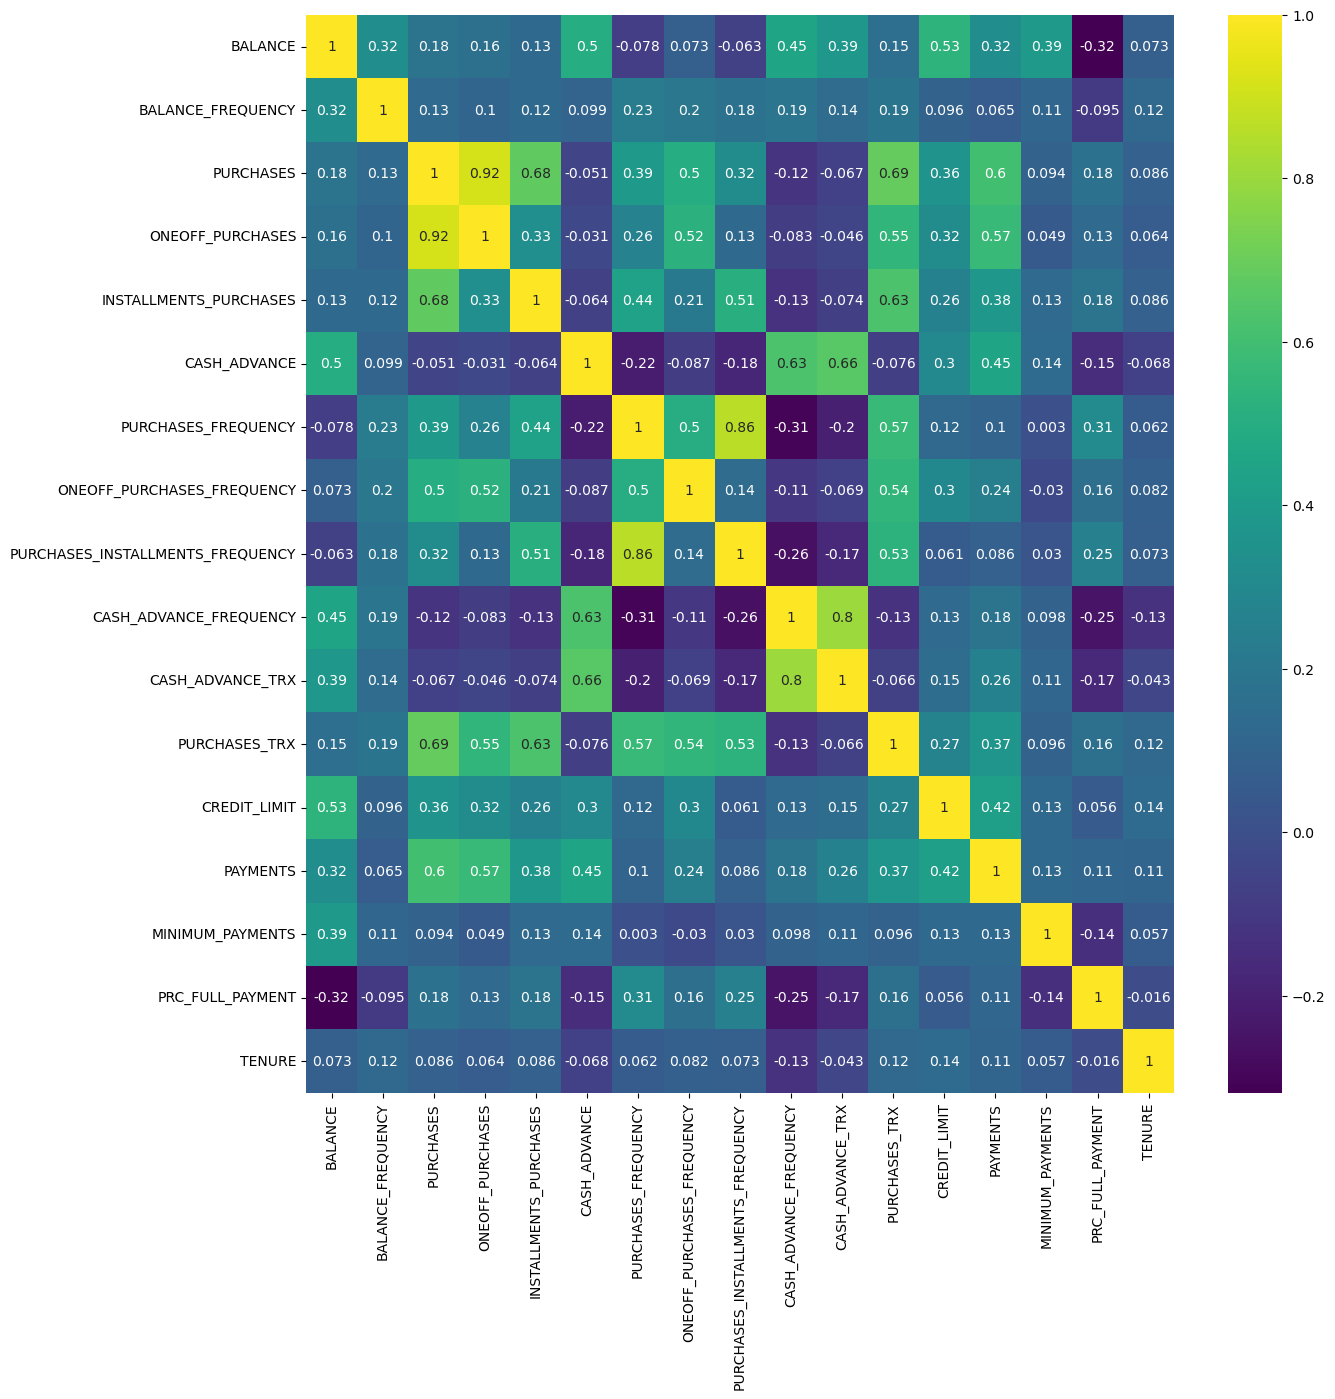

In [11]:
plt.figure(figsize = (14, 14))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)

<Axes: xlabel='BALANCE_FREQUENCY', ylabel='Count'>

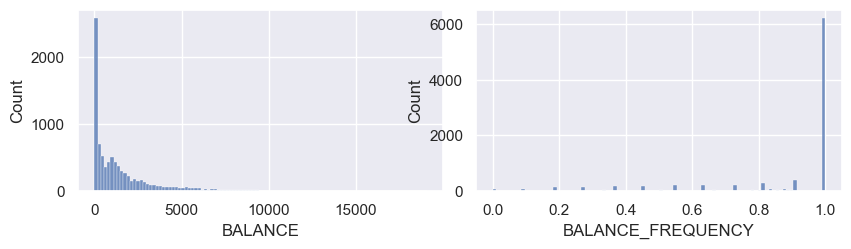

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "BALANCE",ax=ax1)
sns.histplot(data = data,x = "BALANCE_FREQUENCY",ax=ax2)

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

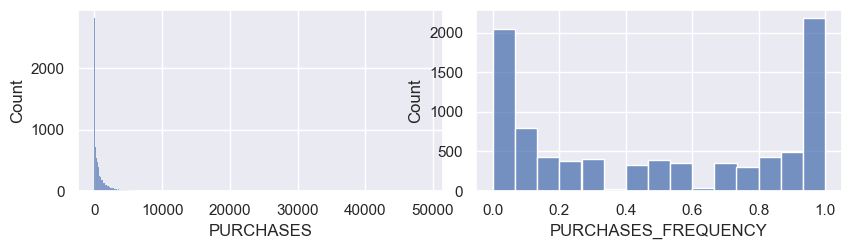

In [13]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "PURCHASES",ax=ax1)
sns.histplot(data = data,x = "PURCHASES_FREQUENCY",ax=ax2)

<Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Count'>

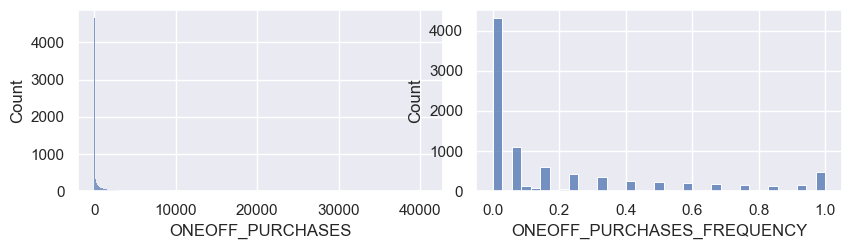

In [14]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "ONEOFF_PURCHASES",ax=ax1)
sns.histplot(data = data,x = "ONEOFF_PURCHASES_FREQUENCY",ax=ax2)

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

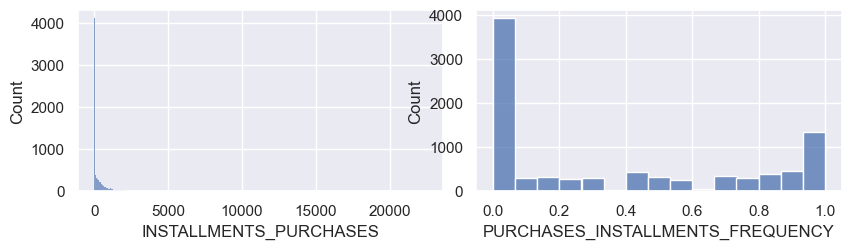

In [15]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "INSTALLMENTS_PURCHASES",ax=ax1)
sns.histplot(data = data,x = "PURCHASES_INSTALLMENTS_FREQUENCY",ax=ax2)

<Axes: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Count'>

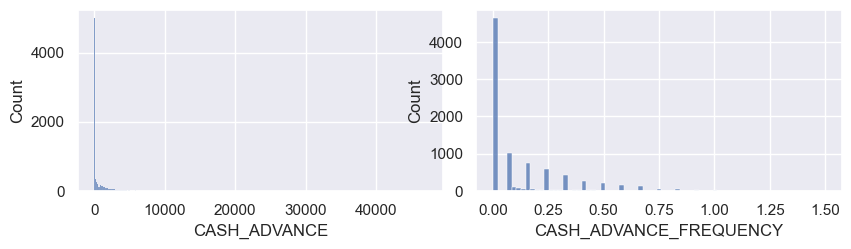

In [16]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "CASH_ADVANCE",ax=ax1)
sns.histplot(data = data,x = "CASH_ADVANCE_FREQUENCY",ax=ax2)

<Axes: xlabel='CASH_ADVANCE_TRX', ylabel='Count'>

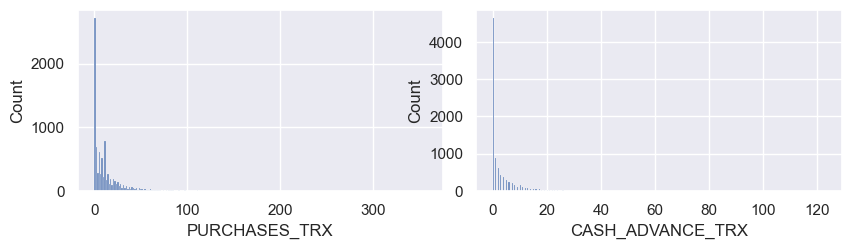

In [17]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "PURCHASES_TRX",ax=ax1)
sns.histplot(data = data,x = "CASH_ADVANCE_TRX",ax=ax2)

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

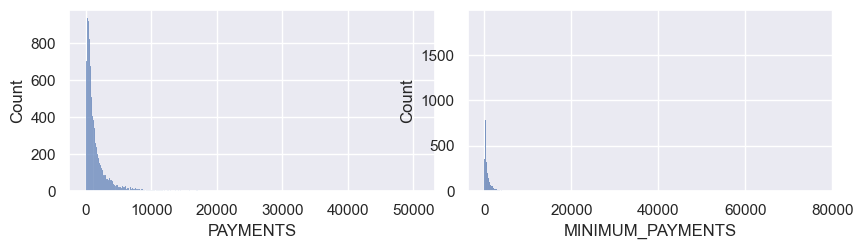

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "PAYMENTS",ax=ax1)
sns.histplot(data = data,x = "MINIMUM_PAYMENTS",ax=ax2)

<Axes: xlabel='PRC_FULL_PAYMENT', ylabel='Count'>

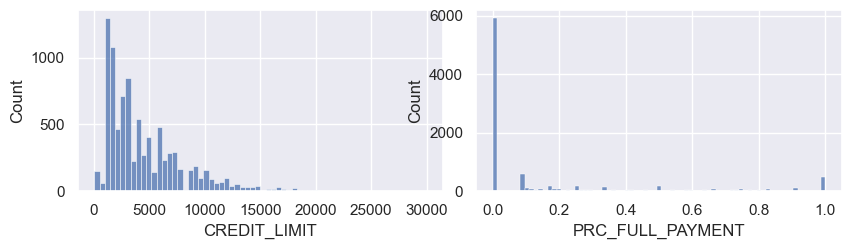

In [19]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid(shape=(3,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid(shape=(3,6), loc=(0,2), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "CREDIT_LIMIT",ax=ax1)
sns.histplot(data = data,x = "PRC_FULL_PAYMENT",ax=ax2)

<Axes: xlabel='TENURE', ylabel='Count'>

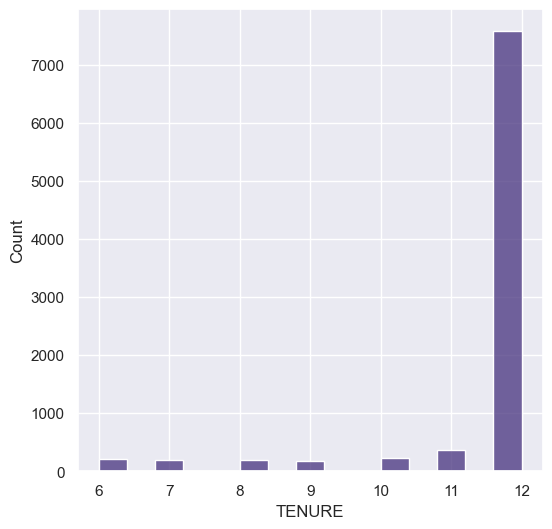

In [20]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(palette="viridis")
sns.histplot(data = data,x = "TENURE")

<Axes: xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

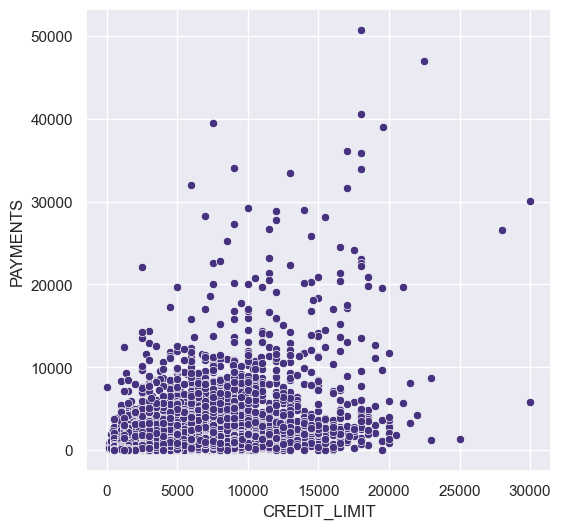

In [21]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(palette="viridis")
sns.scatterplot(x=data["CREDIT_LIMIT"],y=data["PAYMENTS"])

# KMeans Clustering

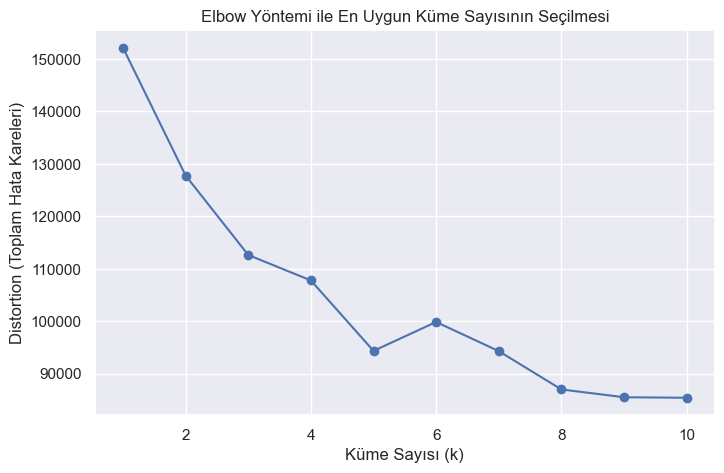

In [22]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None

    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # Initialize centroids randomly
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0),
                                           size=(self.n_clusters, X.shape[1]))
        for _ in range(self.max_iters):
            y = []

            for data_point in X:
                distances = KMeans.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
                
            y = np.array(y)  # Kümeleri temsil eden etiketler numpy array'e çevrilir
            
            cluster_indices = []

            for i in range(self.n_clusters):
                cluster_indices.append(np.argwhere(y == i))
                
            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            if np.max(self.centroids - np.array(cluster_centers)) < 0.001:
                break
            else:
                self.centroids = np.array(cluster_centers)
        return y

    def compute_distortion(self, X, labels):
        distortion = 0
        for i, centroid in enumerate(self.centroids):
            cluster_points = X[labels == i]  # Her kümenin elemanlarını seçiyoruz
            distortion += np.sum((cluster_points - centroid) ** 2)
        return distortion


# Elbow Yöntemi için for döngüsü
def elbow_method(X, max_k=10):
    distortions = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.predict(X)
        distortion = kmeans.compute_distortion(X, labels)
        distortions.append(distortion)
    
    # Distortion değerlerini grafikte çizdirme
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, distortions, 'bo-')
    plt.xlabel('Küme Sayısı (k)')
    plt.ylabel('Distortion (Toplam Hata Kareleri)')
    plt.title('Elbow Yöntemi ile En Uygun Küme Sayısının Seçilmesi')
    plt.show()

X = data.values
scaler = StandardScaler() #standartlaştırma işlemi yapılır.
df = scaler.fit_transform(X)
elbow_method(df, max_k=10)

In [27]:
kmeans = KMeans(n_clusters=8, max_iters=100)
# K-means algoritmasını çalıştırın ve kümeleri elde edin.
clusters = kmeans.predict(df)
# df'ye bir 'Cluster' sütunu ekleyin ve her veri noktasının hangi kümeye ait olduğunu belirtin.
data['Cluster'] = clusters
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


<Axes: xlabel='Cluster', ylabel='count'>

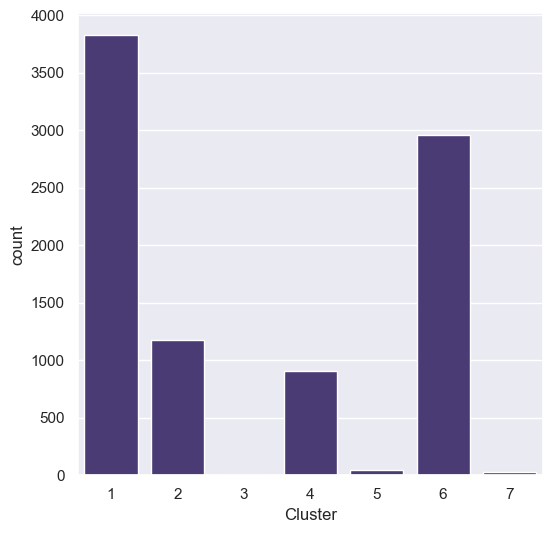

In [28]:
sns.countplot(x = data["Cluster"])

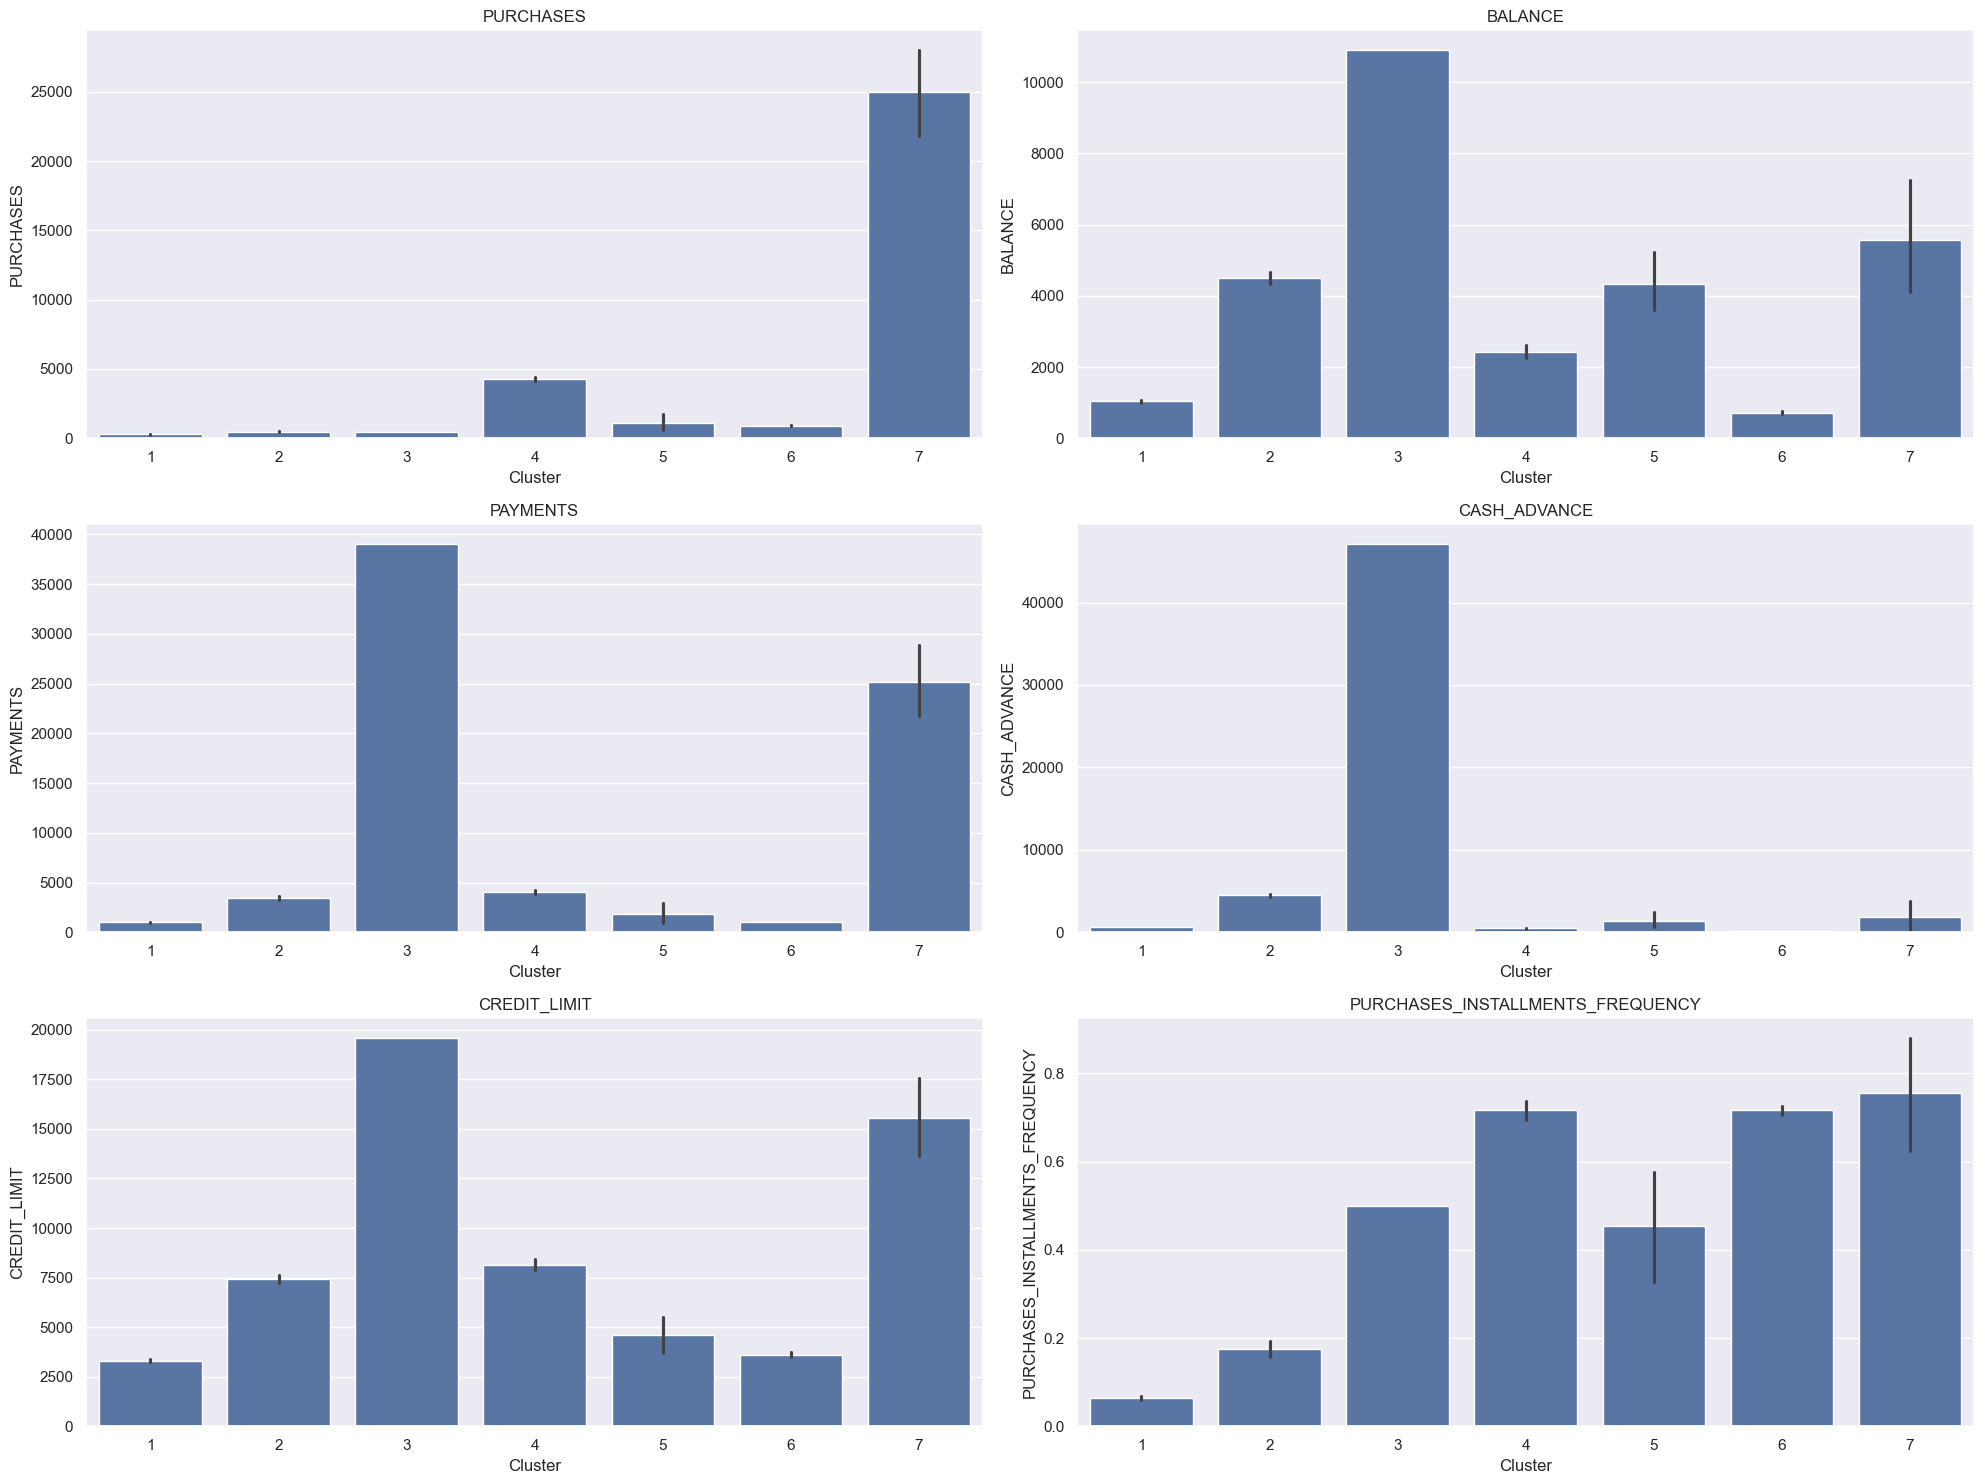

In [33]:
# Grafiklerin boyutlarını ayarlıyoruz
sns.set(rc={'figure.figsize':(20,15)})

# Görselleştirmek istediğiniz sütunlar
columns = ['PURCHASES', 'BALANCE', 'PAYMENTS', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PURCHASES_INSTALLMENTS_FREQUENCY']

# Altı farklı grafiği düzenleyecek alt çizgi alanları oluşturuyoruz
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Her bir değişken için bar grafikleri çiziyoruz
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(x=data['Cluster'], y=data[column], ax=ax)
    ax.set_title(column)

# Boş olan eksenleri gizle
if len(columns) % 2 != 0:
    for j in range(len(columns), 6):
        fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()